### 1. CHARGEMENT DES LIBRAIRIES ET DONNEES

### 2. TEXT PROCESSING 
    - Tokenization
    - Stemming
    - Stopword
    - Cleanning
### 3. LDA GENSIM AVEC T-SNE
    - Dictionnaire
    - Matrice Corpus
    - Feature extration
    - Visualisation 
    - Interpretation
### 4. SEGMENTATION
    - TFIDF
    - KMEANS
    - Kmeans optimisé
    - Visualisation
    - Interpretation
### 5. SYNTHESE

# 1. CHARGEMENT DES DES LIBRAIRIES ET DONNEES

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import re

################################### NLTK LIBRAIRIES ##################################
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

### INSTALATION DE SPACY via conda prompt administration
### (python -m spacy download fr_core_news_sm)
### LEMMATISATION MOTS Français
import spacy

############################################ Sklearn  ##################################
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer , CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF, LatentDirichletAllocation

############################################# WORD CLOUD LIBRAIRIES ####################
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# PLOT LIBRAIRIE
import matplotlib.pyplot as plt
%matplotlib inline

################################### LDA VIS ############################################
import gensim
import pyLDAvis.gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary, MmCorpus
from gensim.models import LdaModel
from IPython.core.display import display, HTML


######################### CHARGEMENT DU FICHIER ############################################
#data = pd.read_csv('C:/Users/fatch/Downloads/activites.csv')
data = pd.read_csv('activites.csv', sep=',')
print(len(data))
data.head(2)

6663


,description
0,entreprises de menuiserie fabricant de porte p...
1,cheminees accessoires specialiste du fer forg...


## 2. TEXT PROCESSING

In [2]:
## Comptage des mots 
data['word_count'] = data['description'].apply(lambda x: len(str(x).split(" ")))
data.head(3)

,description,word_count
0,entreprises de menuiserie fabricant de porte p...,38
1,cheminees accessoires specialiste du fer forg...,150
2,bricolage outillage reproduction de cle robin...,86


In [3]:
### LISTES DE STOP WORDS FR
stop_words = set(stopwords.words("french"))

#NOUVELLES LISTES DES MOTS Fr 
new_words = ["alors","au","autour","contre","apres","assez","afin","aucuns","aucune","aucunes","chacunes","chacuns","chacune","chacun","aussi","ainsi","autre","autres","avant","avec","avoir","bon","car","ce","cela","ces",
"ceux","chaque","ci","comme","comment","dans","des","du","de","dedans","dehors","depuis","devrait",
"doit","donc","dos","début","elle","elles","en","encore","essai","est","et","eu","eux","ensuite","enfin","ensuite","fait","faites",
"fois","font","hors","ici","il","ils","je","juste","la","le","les","leur","leurs""là","ma","maintenant",
"mais","me""mes","mine","moins","mon","mot","même","meme","ni","nommés","mots""nommes","notre","nous",
"nos","ou","où","ont","on","par","parce","pas","plus","peut","peu","plupart","pour","pourquoi","quand","que","quel",
"quelle","quelles","quant","quels","qui","quoi","sa","sans","ses","seulement","si","se","sien","son","sont","sous",
"soyez","sujet","sur","ta","te","tel","tandis","tellement","tels","tes","ton","toutes","toute","tous","tout","trop","tres",
"très","tu","voient","vont","votre","vos","vous","vu","ça","ca","étaient","état","étions","été","être","etre","etions","etre",
"un","une","etiez","etaient","ete"]
stop_words = stop_words.union(new_words)
# SUPPRESSION DES STOP WORDS
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [4]:
# les mots fréquents
freq = pd.Series(' '.join(data['description']).split()).value_counts()[:15]
# suppression des mots plus fréquents
freq = list(freq.index)
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# Les mots non fréquents
freq1 =  pd.Series(' '.join(data['description']).split()).value_counts()[-15:]
# suppression des mots rares
freq1 = list(freq1.index)
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))

In [5]:
# NETTOYAGE DU DOCUMENT 
corpus = []
for i in range(0,len(data)):
    #suppression ponctiations
    text = re.sub('[^a-zA-Z]', ' ', data['description'][i])
    #Convertion en mininuscule
    text = text.lower()
    #suppression de tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    # suppression des nombres et caractères speciaux
    text=re.sub("(\\d|\\W)+"," ",text)
    # remplacement des espaces(+plus que 2) par un espace
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    # suppression des caratères simples
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    # suppression des caratères uniques
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    ##Convert to list from string
    text = text.split()
    text = " ".join(text)
    corpus.append(text)
corpus = [str for str in corpus if str]

In [6]:
# LEMMISATION
nlp = spacy.load('fr_core_news_sm')
doc=[]
for p in range(0,len(corpus)):
    texte = nlp(corpus[p])
    texte=" ".join([token.lemma_ for token in texte])
    doc.append(texte)

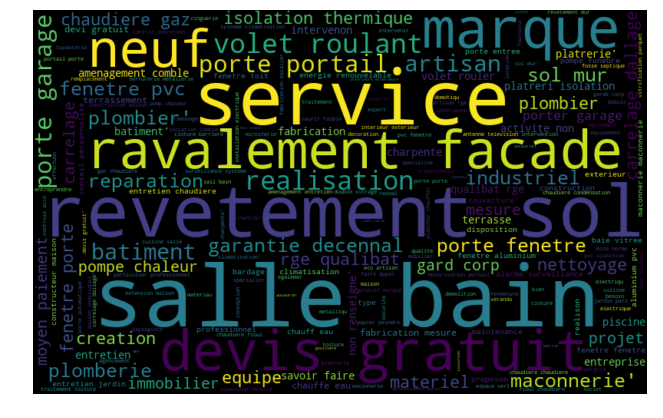

In [7]:
wordcloud = WordCloud(width=800, height=500, stopwords=stop_words,random_state=21, max_font_size=110).generate(str(doc))
fig=plt.figure(figsize=(11, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');
fig.savefig("word.png", dpi=2500)

AVEC LE UNIGRAM: DANS LA DESCRIPTION DU BTP, on trouve des thèmes comme Maçonnerie,couverture,amenagement,service
Ce historgrame permet de montrer une première exploiration textuelle des thèmes


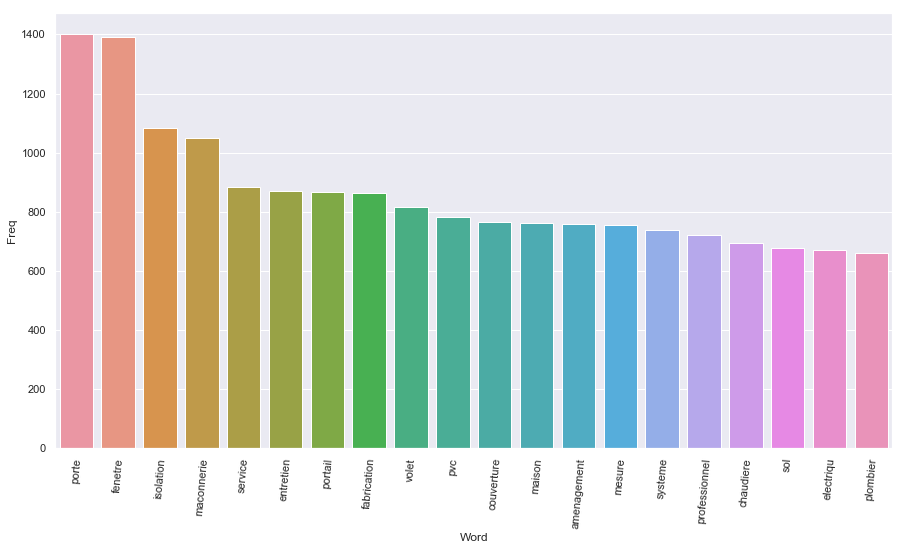

In [8]:
#Uni-gram mots fréquents top 20
# Fonction qui extrait les mots les plus fréquents
def top_words_unigram(d, n=None):
    vec = CountVectorizer().fit(d)
    bag_of_words = vec.transform(d)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Conversion en Data frame
top_words = top_words_unigram(doc, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
un = sns.barplot(x="Word", y="Freq", data=top_df)
un=un.set_xticklabels(un.get_xticklabels(), rotation=85)
print('AVEC LE UNIGRAM: DANS LA DESCRIPTION DU BTP, on trouve des thèmes comme Maçonnerie,couverture,amenagement,service')
print('Ce historgrame permet de montrer une première exploiration textuelle des thèmes')

Ce historgrame permet de montrer une première composition des thèmes dans la description du BTP


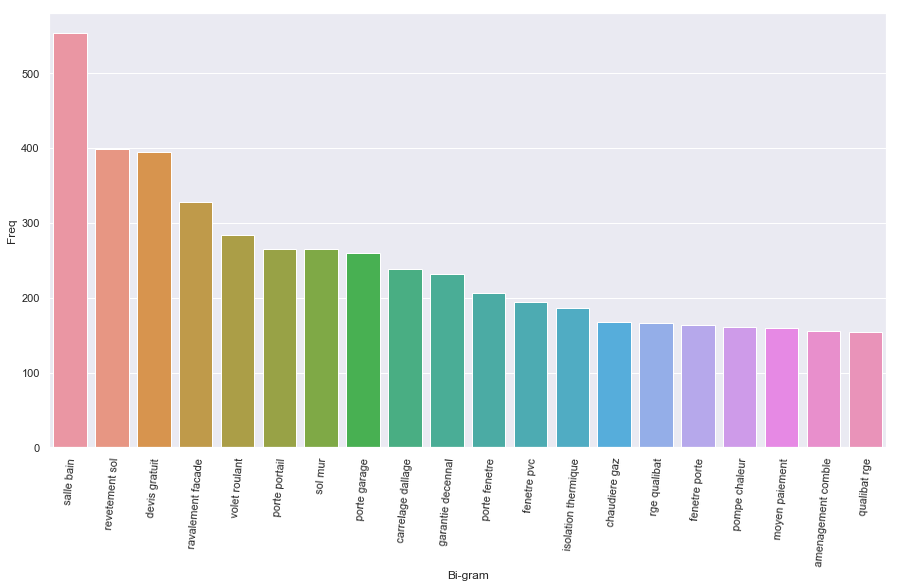

In [9]:
#Bi-gram mots fréquents top 20
def top_words_bigram(d, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2)).fit(d)
    bag_of_words = vec1.transform(d)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
#Conversion Data frame
top2_words = top_words_bigram(doc, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#Barplot 
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
bi=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
bi=bi.set_xticklabels(bi.get_xticklabels(), rotation=85)
print('Ce historgrame permet de montrer une première composition des thèmes dans la description du BTP')

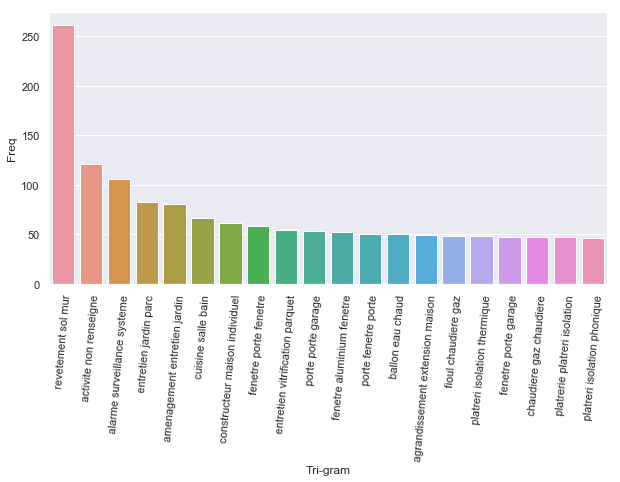

In [10]:
# Most fréquents Tri-grams top 20
def top_words_trigram(d, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3)).fit(d)
    bag_of_words = vec1.transform(d)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
#Conversion Data frame
top3_words = top_words_trigram(doc, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
#Barplot 
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
tr=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
tr=tr.set_xticklabels(tr.get_xticklabels(), rotation=85)

# 3. LDA(Latent DiRichlet allocation) 

### Avec visualisation en T-SNE(t-distributed stochastic neighbor embedding) : algorithme d'apprentissage non supervisée

C'est de découvrir les sujets cachés dans le document afin d'avoir une idée des thèmes et leurs représentation.
       - Une première exploration!

In [11]:
import warnings
warnings.filterwarnings("ignore")

# Dictionnaire
dictionnaire = corpora.Dictionary(d.split() for d in doc)
dictionnaire.save('dictionnaire.dict') # enregistrement du dictionnaire

# Matrice corpus
corp= [dictionnaire.doc2bow(doc) for text in doc]
corpora.MmCorpus.serialize('corpus.mm', corp) # enregistrement de la matrice corpus

# LDA sur la matrice du document
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corp, num_topics=5, id2word = dictionnaire, passes=20) # avec 5 thèmes choisi(ce choix a éte influencé par les histogrames
#car il y a eu une première idée sur les thèmes les plus frequents)
ldamodel.save('topic.model') # enregistrement du modèle

# Visualisation des topics
d = gensim.corpora.Dictionary.load('dictionnaire.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('topic.model')
vis= pyLDAvis.gensim.prepare(lda, c, d, mds='tsne')
pyLDAvis.enable_notebook()
print('INTERPRETATION:')  
print('les topics trouvés sont entre autre amenagement/couverture, Plomberie, Maçonnerie, Système électrique.')
pyLDAvis.display(vis)

INTERPRETATION:
les topics trouvés sont entre autre amenagement/couverture, Plomberie, Maçonnerie, Système électrique.


### 4. TFIDF-- KMEANS

METHODE TF-IDF(Term Frequency - Inverse Document Frequency) : l'importance d'un terme contenu dans le document.
L'objectif de k-means est de minimiser la somme totale de la distance au carré de chaque point jusqu'au centroïde du cluster correspondant.

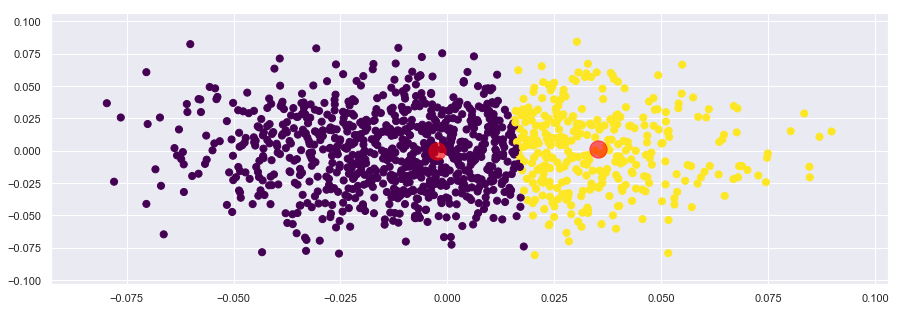

In [12]:
# TFIDF
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=1)
tfidf = tfidf_vectorizer.fit_transform(doc)
tfidf_matrix=tfidf.todense()
tfidf_norm = normalize(tfidf)
tfidf_array = tfidf_norm.toarray()
feature_names = tfidf_vectorizer.get_feature_names()

# KMEANS
pca = PCA(n_components = 2) # pour visualiser en 2D
Y = pca.fit_transform(tfidf_array)
km = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto') # nombre de clusters=2
km = km.fit(Y)
#prediction = km.predict(Y)
# SEGMENTATION PLOT
plt.figure(figsize=(15, 5))
plt.scatter(Y[:, 0], Y[:, 1], c=km.labels_, s=50, cmap='viridis')
# CENTERS PLOT
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=300, alpha=0.6);

### Optimisation du nombre de clusters:
#### La méthode de ELBOW est utilisée , l'idée de cette méthode du coude est d’exécuter une classification k-moyennes sur le jeu de données pour une plage de valeurs de k (disons, k de 1 à 10), et pour chaque valeur de k, on calcul la somme des erreurs au carré

 LE NOMBRE DE CLUSTER OPTIMAL TROUVER EST DE 4


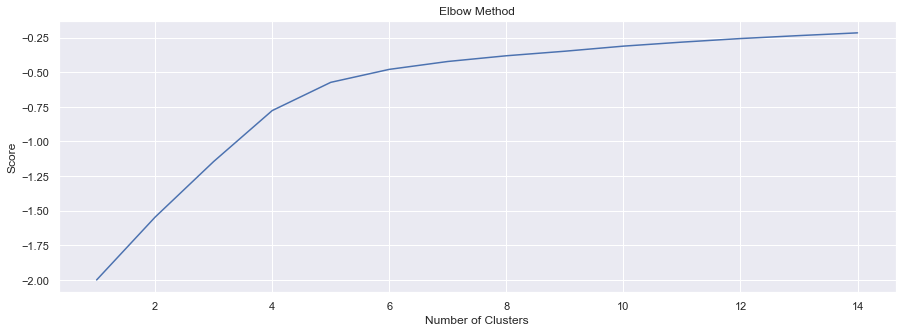

In [13]:
number_clusters = range(1, 15)
#kmeans  clusters
km = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
# score
score = [km[i].fit(Y).score(Y) for i in range(len(km))]
# Plot numbre de clusters
plt.figure(figsize=(15, 5))
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
print( ' LE NOMBRE DE CLUSTER OPTIMAL TROUVER EST DE 4')

#### KMEANS OPTIMAL

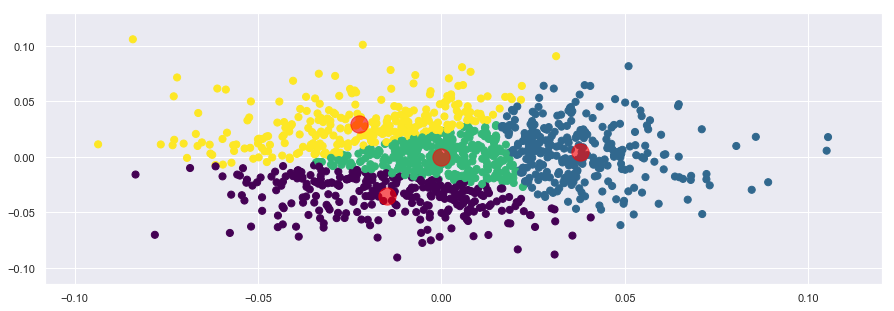

In [14]:
#KMEANS OPTIMAL
pca = PCA(n_components = 2)
Y = pca.fit_transform(tfidf_array)
km = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto',init='k-means++',n_init=1)
km=km.fit(Y)
#prediction = km.predict(Y)
plt.figure(figsize=(15, 5))
#SEGMENTATION PLOT
plt.scatter(Y[:,0], Y[:,1], c=km.labels_, s=50, cmap='viridis')
#PLOT CLUSTERS
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='red', s=300, alpha=0.6)

### Recherche des tops thèmes donnés par Kmeans

In [15]:
vectorizer = TfidfVectorizer()
tf = vectorizer.fit_transform(doc)
feature_names = vectorizer.get_feature_names()

km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
km.fit(tf)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
print ("Top terms per cluster:")
for i in range(4):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :5]:
        print (' %s,' % feature_names[ind],)
    print('\n')

Top terms per cluster:
Cluster 0:
 couverture,
 charpente,
 toiture,
 zinguerie,
 couvertur,


Cluster 1:
 maconnerie,
 dallage,
 beton,
 chap,
 batiment,


Cluster 2:
 platrerie,
 fenetre,
 volet,
 porte,
 sol,


Cluster 3:
 plombier,
 batiment,
 climatisation,
 immobilier,
 industriel,




En faisant le KMEANS et en optimisant le nombre de cluster grâce à la méthode ELBOW, 4 clusters ont été trouvé
Cette méthode a permis de segmenter autour de 4 thèmes
- Maçonnorie
- platrerie
- couverture
- plombérie


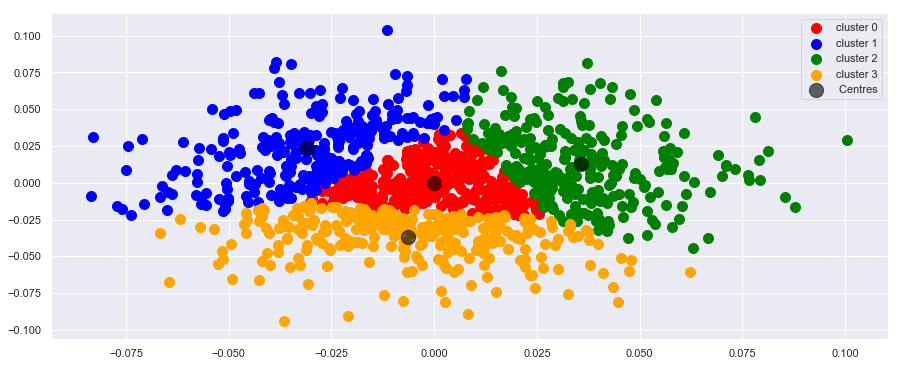

In [16]:
#KMEANS OPTIMAL
pca = PCA(n_components = 2)
Y = pca.fit_transform(tfidf_array)
km = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto',init='k-means++',n_init=1)
km=km.fit(Y)

plt.figure(figsize=(15, 6))
plt.scatter(Y[km.labels_ == 0, 0], Y[km.labels_ == 0, 1], s = 100, c = 'red', label = 'cluster 0')
plt.scatter(Y[km.labels_ == 1, 0],Y[km.labels_== 1, 1], s = 100, c = 'blue', label = 'cluster 1')
plt.scatter(Y[km.labels_== 2, 0],Y[km.labels_ == 2, 1], s = 100, c = 'green', label = 'cluster 2')
plt.scatter(Y[km.labels_== 3, 0],Y[km.labels_ == 3, 1], s = 100, c = 'orange', label = 'cluster 3')

#PLOT CLUSTERS
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='black', s=200, alpha=0.6,label = ' Centres')

plt.legend()
print ('En faisant le KMEANS et en optimisant le nombre de cluster grâce à la méthode ELBOW, 4 clusters ont été trouvé')
print( 'Cette méthode a permis de segmenter autour de 4 thèmes')   
print( '- Maçonnorie')
print( '- platrerie')
print( '- couverture')
print( '- plombérie')

# Synthèse: 

La méthode de LDA avec la méthode de visualisation TSNE nous a donnée globalement une idée des thèmes fréquents.
La méthode de Kmeans en utilisant la matrice de TFIDF(recherche des informations pertinentes au sein du document) a donné aussi presque les mêmes thèmes, celle-ci étant optimisée.

En conclusion le document a été segmenter en 4 thèmes (thèmes donnés par la méthode de KMEANS-TFIDF) : 
    - Maçonnerie
    - Plomberie
    - Couveture
    - Platerie 

### Concatenation de entre la description et les clusters

In [17]:
resultat = pd.DataFrame()
resultat['description'] = doc
resultat['categories'] = km.labels_
resultat.head(10)

,description,categories
0,fabricant porte portail aluminium porte entree...,0
1,cheminee accessoire specialist fer forg deplac...,0
2,bricolage outillage reproduction cle robinette...,1
3,revetement sol mur entreprise decoratif consei...,0
4,sanitaire couverture,0
5,rideal voilage tissu ameublement store interie...,0
6,couverture couverture zinguerie tubage chemine...,1
7,plombier plomberie contrat entretien sanitaire...,0
8,pompe funebre marbrerie fleuriste contrat prev...,1
9,carrelage dallage carrelage faience mosaiqu sa...,0
